Tauqeer, q3 and q2

In [14]:
import numpy as np

# Given data
distances = np.array([2, 4, 6, 8, 10])
pollution = np.array([11.5, 10.2, 10.3, 9.68, 9.32])

# Calculate sample means
x_bar = np.mean(distances)
y_bar = np.mean(pollution)

# Least squares estimator for beta_1
beta_1 = np.sum((distances - x_bar) * (pollution - y_bar)) / np.sum((distances - x_bar)**2)

# Least squares estimator for beta_0
beta_0 = y_bar - beta_1 * x_bar

# Calculate predicted values
y_hat = beta_0 + beta_1 * distances

# Residuals
residuals = pollution - y_hat
print(residuals)
# Adjusted maximum likelihood estimator for sigma^2
sigma_hat_squared = np.sum(residuals**2) / (len(distances) - 2)

# Output the results
print(f"Least Squares Estimator for beta_1: {beta_1}")
print(f"Least Squares Estimator for beta_0: {beta_0}")
print(f"Adjusted Maximum Likelihood Estimator for sigma^2: {sigma_hat_squared}")


[ 0.324 -0.488  0.1   -0.032  0.096]
Least Squares Estimator for beta_1: -0.24399999999999994
Least Squares Estimator for beta_0: 11.663999999999998
Adjusted Maximum Likelihood Estimator for sigma^2: 0.12112000000000038


In [2]:
import os
import pandas as pd
import numpy as np

In [16]:
# Getting the home directory
home_dir = os.path.expanduser("~")

# Constructing file paths
x_file_path = os.path.join(home_dir, 'Downloads', 'X.txt')
y_file_path = os.path.join(home_dir, 'Downloads', 'Y.txt')

# Load data into numpy arrays
X = np.genfromtxt(x_file_path, delimiter=',', dtype=None, skip_header=0)
Y = np.genfromtxt(y_file_path, dtype=float, skip_header=0)

# Add a column of ones to the first row
X = np.insert(X, 0, 1, axis=1)
print(X)

[[ 1.        0.54402  -0.83907  -5.      ]
 [ 1.        0.45754  -0.88919  -4.95    ]
 [ 1.        0.36648  -0.93043  -4.9     ]
 [ 1.        0.27176  -0.96236  -4.85    ]
 [ 1.        0.17433  -0.98469  -4.8     ]
 [ 1.        0.075151 -0.99717  -4.75    ]
 [ 1.       -0.024775 -0.99969  -4.7     ]
 [ 1.       -0.12445  -0.99223  -4.65    ]
 [ 1.       -0.22289  -0.97484  -4.6     ]
 [ 1.       -0.3191   -0.94772  -4.55    ]
 [ 1.       -0.41212  -0.91113  -4.5     ]
 [ 1.       -0.50102  -0.86544  -4.45    ]
 [ 1.       -0.58492  -0.81109  -4.4     ]
 [ 1.       -0.66297  -0.74865  -4.35    ]
 [ 1.       -0.7344   -0.67872  -4.3     ]
 [ 1.       -0.79849  -0.60201  -4.25    ]
 [ 1.       -0.8546   -0.51929  -4.2     ]
 [ 1.       -0.90217  -0.43138  -4.15    ]
 [ 1.       -0.94073  -0.33915  -4.1     ]
 [ 1.       -0.96989  -0.24354  -4.05    ]
 [ 1.       -0.98936  -0.1455   -4.      ]
 [ 1.       -0.99894  -0.046002 -3.95    ]
 [ 1.       -0.99854   0.053955 -3.9     ]
 [ 1.      

In [4]:
X_4 = X[:4,]
Y_4 = Y[:4]
print(X_4)

# Compute (X_4^T X_4)^-1
inverse_XtX_4 = np.linalg.inv(X_4.T @ X_4)
print(inverse_XtX_4)

# Compute the LS-estimator beta_hat_4
beta_hat_4 = inverse_XtX_4 @ X_4.T @ Y_4
print(beta_hat_4)


[[ 1.       0.54402 -0.83907 -5.     ]
 [ 1.       0.45754 -0.88919 -4.95   ]
 [ 1.       0.36648 -0.93043 -4.9    ]
 [ 1.       0.27176 -0.96236 -4.85   ]]
[[1.86905389e+09 1.73429582e+08 7.85725784e+07 3.79496962e+08]
 [1.73429582e+08 1.60951095e+07 7.28635963e+06 3.52145591e+07]
 [7.85725784e+07 7.28635963e+06 3.31066964e+06 1.59517962e+07]
 [3.79496962e+08 3.52145591e+07 1.59517962e+07 7.70543366e+07]]
[6294.73555018  612.53125435  218.07353158 1287.54696686]


In [12]:
# X_5 is the next data point
X_5 = X[4, :]
print(X_5)
# Compute u and v
u = inverse_XtX_4 @ X_4.T @ X_5
v = X_5.T @ X_4 @ inverse_XtX_4
print(u)
print(v)
# Express XtX_n1 as XtX_4 + uv^T
XtX_n1 = X_4.T @ X_4 + np.outer(u, v)
print(XtX_n1)

[ 1.       0.17433 -0.98469 -4.8    ]
[-22771.1181938   -2020.35492814  -1079.56924732  -4593.07950257]
[-22771.11825657  -2020.3549341   -1079.56924981  -4593.07951498]
[[5.18523829e+08 4.60057426e+07 2.45829954e+07 1.04589537e+08]
 [4.60057426e+07 4.08183476e+06 2.18111159e+06 9.27964273e+06]
 [2.45829954e+07 2.18111159e+06 1.16547305e+06 4.95856522e+06]
 [1.04589537e+08 9.27964274e+06 4.95856522e+06 2.10964764e+07]]


In [23]:
# Initialize inverse_XtX_n and beta_hat_201 using the values for n=4
inv_XTX_n = inverse_XtX_4
beta_hat_n = beta_hat_4

# Iterative update    
for i in range(5,201):
    
    xi = X[i,:].reshape(-1,1) # Next row 
    yi = Y[i]
    
    # Compute u,v 
    u = inv_XTX_n @ X_4.T @ xi
    v = xi.T @ X_4 @ inv_XTX_n
    # Update inverted matrix 
    term1 = inv_XTX_n @ np.outer(v, u) @ inv_XTX_n
    term2 = 1 / (1 - u.T @ v.T)
    inv_XTX_n1 = inv_XTX_n - term1 * term2

    # Update beta
    Xn1 = X[:i+1,:] 
    Yn1 = Y[:i+1]
    beta_n1 = inv_XTX_n1 @ Xn1.T @ Yn1
    
    # Reset 
    inv_XTX_n = inv_XTX_n1
    beta_n = beta_n1
    
print(beta_n1)

[nan nan nan nan]


/var/folders/vz/m1374jz14h97zfkfkyxsr6840000gp/T/ipykernel_26474/1368916681.py:15: RuntimeWarning: overflow encountered in matmul
  term1 = inv_XTX_n @ np.outer(v, u) @ inv_XTX_n
/var/folders/vz/m1374jz14h97zfkfkyxsr6840000gp/T/ipykernel_26474/1368916681.py:22: RuntimeWarning: invalid value encountered in matmul
  beta_n1 = inv_XTX_n1 @ Xn1.T @ Yn1
/var/folders/vz/m1374jz14h97zfkfkyxsr6840000gp/T/ipykernel_26474/1368916681.py:12: RuntimeWarning: invalid value encountered in matmul
  u = inv_XTX_n @ X_4.T @ xi
/var/folders/vz/m1374jz14h97zfkfkyxsr6840000gp/T/ipykernel_26474/1368916681.py:13: RuntimeWarning: invalid value encountered in matmul
  v = xi.T @ X_4 @ inv_XTX_n


[ 1.        0.075151 -0.99717  -4.75    ]
[nan nan nan nan]
[nan nan nan nan]
[[nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]]
[nan]
[ 1.       -0.024775 -0.99969  -4.7     ]
[nan nan nan nan]
[nan nan nan nan]
[[nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]]
[nan, nan]
[ 1.      -0.12445 -0.99223 -4.65   ]
[nan nan nan nan]
[nan nan nan nan]
[[nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]]
[nan, nan, nan]
[ 1.      -0.22289 -0.97484 -4.6    ]
[nan nan nan nan]
[nan nan nan nan]
[[nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]]
[nan, nan, nan, nan]
[ 1.      -0.3191  -0.94772 -4.55   ]
[nan nan nan nan]
[nan nan nan nan]
[[nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]]
[nan, nan, nan, nan, nan]
[ 1.      -0.41212 -0.91113 -4.5    ]
[nan nan nan nan]
[nan nan nan nan]
[[nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]]
[nan, 

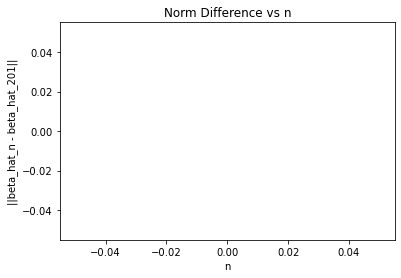

In [26]:
import matplotlib.pyplot as plt

inverse_XtX_n = inverse_XtX_4
beta_hat_n = beta_hat_4
# Initialize a list to store the norm differences
norm_diff_list = []

for n in range(5, 201):
    # Extract the next data point
    X_n1 = X[n, :]

    # Compute u and v
    u = inverse_XtX_n @ X_4.T @ X_n1
    v = X_n1.T @ X_4 @ inverse_XtX_n
    print(u)
    print(v)

    # Express XtX_n1 as XtX_n + uv^T
    XtX_n1 = X_4.T @ X_4 + np.outer(u, v)
    print(XtX_n1)

    # Update using Sherman-Morrison formula with regularization
    regularization_term = 1e-5  # You can adjust the value based on your data
    inverse_XtX_n -= np.outer(inverse_XtX_n @ X_n1, u) @ inverse_XtX_n / (1 + v @ inverse_XtX_n @ X_n1 + regularization_term)

    # Update beta_hat_n
    beta_hat_n += u * (Y[n-1] - X_n1 @ beta_hat_n)

    # Compute the norm difference and append to the list
    norm_diff = np.linalg.norm(beta_hat_n - beta_hat_4)
    norm_diff_list.append(norm_diff)
    print(norm_diff_list)

# Plot the results
plt.plot(range(5, 201), norm_diff_list)
plt.xlabel('n')
plt.ylabel('||beta_hat_n - beta_hat_201||')
plt.title('Norm Difference vs n')
plt.show()


[2.41784515 0.41845204 0.92011547 0.1549124  0.32944876]
[2.551356503449241e-10, 5.619736675358237e-06, 6.846240810829554e-05, 0.000834042873314527]


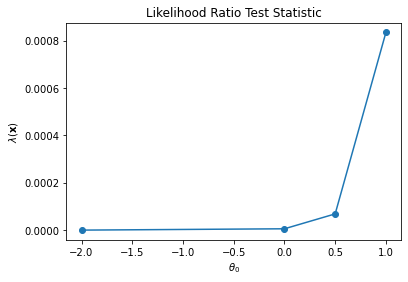

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
n = 5  # Sample size
x = np.random.exponential(scale=1, size=n)  # Generate random sample from exponential distribution
print(x)

# Values of theta_0
theta_0_values = [-2, 0, 0.5, 1]

# Calculate the likelihood ratio test statistic 
lambda_values = [np.exp(-n * (np.max(x) - theta_0)) for theta_0 in theta_0_values]
print(lambda_values)

# Plot the results
plt.plot(theta_0_values, lambda_values, marker='o')
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\lambda(\mathbf{x})$')
plt.title('Likelihood Ratio Test Statistic')
plt.show()


[1.1910321  1.71162134 0.15182921 0.41036747 0.28098227]
[1.0721630723774378e-06, 0.02361596324017651, 0.2877013295496456, 3.504919709724917]


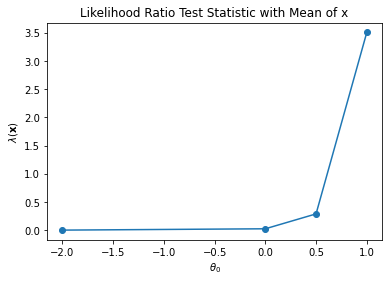

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
n = 5  # Sample size
x = np.random.exponential(scale=1, size=n)  # Generate random sample from exponential distribution
print(x)

# Values of theta_0
theta_0_values = [-2, 0, 0.5, 1]

# Calculate the likelihood ratio test statistic with mean of x
lambda_values = [np.exp(-n * (np.mean(x) - theta_0)) for theta_0 in theta_0_values]
print(lambda_values)

# Plot the results
plt.plot(theta_0_values, lambda_values, marker='o')
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\lambda(\mathbf{x})$')
plt.title('Likelihood Ratio Test Statistic with Mean of x')
plt.show()
